In [1]:
import deepSI
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import optim, nn
plt.rcParams.update({'font.size': 14})

### Load data silverbox data

see: https://sites.google.com/view/nonlinear-benchmark/

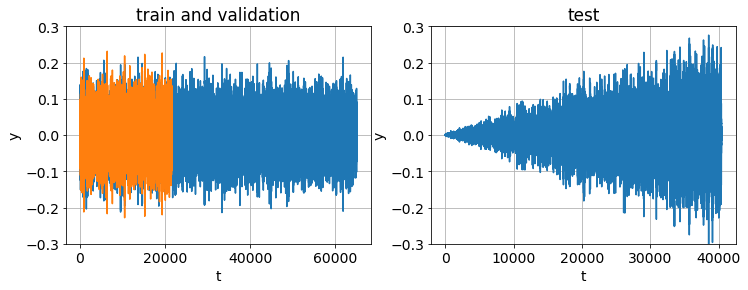

In [2]:
full = deepSI.datasets.Silverbox(split_data=False)
test = full.sdl[1][100:40575] #manual selection of test section
train, val = deepSI.datasets.Silverbox()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('train and validation')
train.plot()
val.plot()
plt.grid()
plt.ylim(-0.3,0.3)
plt.subplot(1,2,2)
plt.title('test')
plt.ylim(-0.3,0.3)
test.plot()
plt.grid()
plt.show()
# print('train =',train)
# print('test =',test)

## Fit/load encoder models

In [6]:
if True:
    sys2 = deepSI.fit_systems.SS_encoder(nx=2,na=50,nb=50) #default is 2 hidden layers with 64 nodes
    #fitting can be and was stopped early with a keyboard interupt.
    sys2.fit(train,train[-30000:],epochs=4000,batch_size=256,loss_kwargs=dict(nf=100)) #not using validation set during training
    sys2.save_system('./Silver-data/silverbox_nx2_1-test')
    
    sys4 = deepSI.fit_systems.SS_encoder(nx=4,na=50,nb=50) 
    sys4.fit(train,train[-30000:],epochs=4000,batch_size=256,loss_kwargs=dict(nf=100))
    sys4.save_system('./Silver-data/silverbox_nx4_1-test')
    
    sys8 = deepSI.fit_systems.SS_encoder(nx=8,na=50,nb=50) 
    sys8.fit(train,train[-30000:],epochs=4000,batch_size=256,loss_kwargs=dict(nf=100))
    sys8.save_system('./Silver-data/silverbox_nx8_1-test')
else:
    sys2 = deepSI.load_system('./Silver-data/silverbox_nx2_1')
    sys4 = deepSI.load_system('./Silver-data/silverbox_nx4_1')
    sys8 = deepSI.load_system('./Silver-data/silverbox_nx8_1')

Size of the training array =  148.6 MB
N_training_samples = 64913, batch_size = 256, N_batch_updates_per_epoch = 253
Initial Validation NRMS= 1.235034246282752


  0%|          | 0/4000 [00:00<?, ?it/s]

C:\Users\s143190\Anaconda3\lib\site-packages\torch\autograd\__init__.py:147: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  Variable._execution_engine.run_backward(


########## New lowest validation loss achieved ########### NRMS = 0.16828642103343927
Epoch    1, sqrt loss  0.4786, Val NRMS 0.1683, Time Loss: 87.0%, data: 0.2%, val: 12.8%,  6.3 batches/sec
########## New lowest validation loss achieved ########### NRMS = 0.1023385350359625
Epoch    2, sqrt loss  0.1155, Val NRMS 0.1023, Time Loss: 86.7%, data: 0.2%, val: 13.1%,  6.4 batches/sec
Stopping early due to a KeyboardInterrupt
Loaded model with best known validation NRMS of 0.1023 which happened on epoch 2 (epoch_id=2.00)
Size of the training array =  148.6 MB
N_training_samples = 64913, batch_size = 256, N_batch_updates_per_epoch = 253
Initial Validation NRMS= 1.1707471996948025


  0%|          | 0/4000 [00:00<?, ?it/s]

########## New lowest validation loss achieved ########### NRMS = 0.14169277614292453
Epoch    1, sqrt loss  0.4209, Val NRMS 0.1417, Time Loss: 88.4%, data: 0.2%, val: 11.4%,  4.9 batches/sec
########## New lowest validation loss achieved ########### NRMS = 0.0916458842438547
Epoch    2, sqrt loss  0.1182, Val NRMS 0.09165, Time Loss: 88.2%, data: 0.2%, val: 11.6%,  4.9 batches/sec
########## New lowest validation loss achieved ########### NRMS = 0.05834096425089433
Epoch    3, sqrt loss 0.08637, Val NRMS 0.05834, Time Loss: 88.0%, data: 0.2%, val: 11.9%,  5.0 batches/sec
########## New lowest validation loss achieved ########### NRMS = 0.032774894789455764
Epoch    4, sqrt loss 0.04834, Val NRMS 0.03277, Time Loss: 88.0%, data: 0.2%, val: 11.8%,  5.0 batches/sec
Stopping early due to a KeyboardInterrupt
Loaded model with best known validation NRMS of 0.03277 which happened on epoch 4 (epoch_id=4.00)
Size of the training array =  148.6 MB
N_training_samples = 64913, batch_size = 256, 

  0%|          | 0/4000 [00:00<?, ?it/s]

########## New lowest validation loss achieved ########### NRMS = 0.08601082500151752
Epoch    1, sqrt loss  0.3462, Val NRMS 0.08601, Time Loss: 86.5%, data: 0.1%, val: 13.4%,  6.3 batches/sec
########## New lowest validation loss achieved ########### NRMS = 0.05003433294570969
Epoch    2, sqrt loss  0.1198, Val NRMS 0.05003, Time Loss: 86.6%, data: 0.1%, val: 13.3%,  6.1 batches/sec
Epoch    3, sqrt loss  0.1073, Val NRMS 0.05008, Time Loss: 86.7%, data: 0.1%, val: 13.2%,  6.0 batches/sec
########## New lowest validation loss achieved ########### NRMS = 0.0323310500520642
Epoch    4, sqrt loss  0.0391, Val NRMS 0.03233, Time Loss: 86.8%, data: 0.2%, val: 13.0%,  6.0 batches/sec
Stopping early due to a KeyboardInterrupt
Loaded model with best known validation NRMS of 0.03233 which happened on epoch 4 (epoch_id=4.00)


### Calculate RMS and NRMS

In [7]:
train_sim2 = sys2.apply_experiment(train)
test_sim2 = sys2.apply_experiment(test)
val_sim2 = sys2.apply_experiment(val)

train_sim4 = sys4.apply_experiment(train)
test_sim4 = sys4.apply_experiment(test)
val_sim4 = sys4.apply_experiment(val)

train_sim8 = sys8.apply_experiment(train)
test_sim8 = sys8.apply_experiment(test)
val_sim8 = sys8.apply_experiment(val)

In [8]:
print('Main Results Silverbox:\n')
print(f'nx=2 NRMS train {train_sim2.NRMS(train):.5f}, RMS mV train {train_sim2.RMS(train)*1000:.7f}')
print(f'nx=2 NRMS val   {val_sim2.NRMS(val):.5f}, RMS mV val   {val_sim2.RMS(val)*1000:.7f}')
print(f'nx=2 NRMS test  {test_sim2.NRMS(test):.5f}, RMS mV test  {test_sim2.RMS(test)*1000:.7f}')
print(f'nx=2 NRMS test no extra  {test_sim2[:32000].NRMS(test[:32000]):.5f}, RMS {test_sim2[:32000].RMS(test[:32000])*1000:.7f}\n')
print(f'nx=4 NRMS train {train_sim4.NRMS(train):.5f}, RMS train {train_sim4.RMS(train)*1000:.7f}')
print(f'nx=4 NRMS val {val_sim4.NRMS(val):.5f},   RMS mV val {val_sim4.RMS(val)*1000:.7f}')
print(f'nx=4 NRMS test  {test_sim4.NRMS(test):.5f}, RMS  test {test_sim4.RMS(test)*1000:.7f}')
print(f'nx=4 NRMS test no extra  {test_sim4[:32000].NRMS(test[:32000]):.5f}, RMS {test_sim4[:32000].RMS(test[:32000])*1000:.7f}\n')
print(f'nx=8 NRMS train {train_sim8.NRMS(train):.5f}, RMS train {train_sim8.RMS(train)*1000:.7f}')
print(f'nx=8 NRMS val {val_sim8.NRMS(val):.5f}, RMS mV val {val_sim8.RMS(val)*1000:.7f}')
print(f'nx=8 NRMS test  {test_sim8.NRMS(test):.5f}, RMS  test {test_sim8.RMS(test)*1000:.7f}')
print(f'nx=8 NRMS test no extra  {test_sim8[:32000].NRMS(test[:32000]):.5f}, RMS {test_sim8[:32000].RMS(test[:32000])*1000:.7f}')

Main Results Silverbox:

nx=2 NRMS train 0.10653, RMS mV train 5.8103295
nx=2 NRMS val   0.11411, RMS mV val   6.1938068
nx=2 NRMS test  0.19151, RMS mV test  10.2358533
nx=2 NRMS test no extra  0.12284, RMS 5.2789727

nx=4 NRMS train 0.03571, RMS train 1.9478290
nx=4 NRMS val 0.03922,   RMS mV val 2.1286373
nx=4 NRMS test  0.12712, RMS  test 6.7943448
nx=4 NRMS test no extra  0.05204, RMS 2.2365904

nx=8 NRMS train 0.03430, RMS train 1.8707026
nx=8 NRMS val 0.03732, RMS mV val 2.0254112
nx=8 NRMS test  0.10826, RMS  test 5.7865255
nx=8 NRMS test no extra  0.04743, RMS 2.0382715


## Plot Residuals

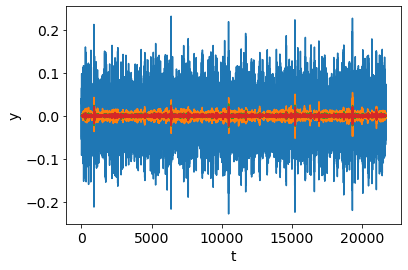

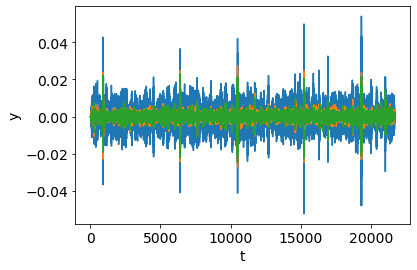

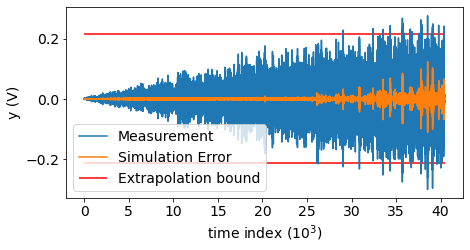

In [9]:
val.plot()
(val-val_sim2).plot()
(val-val_sim4).plot()
(val-val_sim8).plot(show=True)

(val-val_sim2).plot()
(val-val_sim4).plot()
(val-val_sim8).plot(show=True)

# plt.hlines(,0,40575-100,'r')
plt.figure(figsize=(9*0.75,5*0.75))
plt.plot(np.arange(len(test))/1000,test.y)
plt.hlines([np.max(train.y),np.min(train.y)],0,(40575-100)/1000,'r')  #add extrapolation lines
# (test-test_sim2).plot()
plt.plot(np.arange(len(test))/1000,(test-test_sim4).y)
plt.legend(['Measurement','Simulation Error', 'Extrapolation bound'])
plt.xlabel('time index ($10^3$)')
plt.ylabel('y (V)')
plt.tight_layout()
plt.savefig('./Silver-figures/Silverbox_test_error.pdf')
plt.savefig('./Silver-figures/Silverbox_test_error.png',dpi=200)
plt.show()




### Training curves

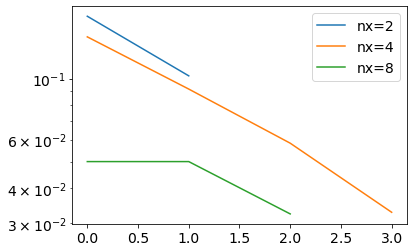

In [10]:
def min_a(A):
    lowest = float('inf')
    ar = []
    for Ai in A:
        if Ai<lowest:
            lowest = Ai
        ar.append(lowest)
    return np.array(ar)

plt.semilogy(min_a(sys2.Loss_val[1:]))
plt.semilogy(min_a(sys4.Loss_val[1:]))
plt.semilogy(min_a(sys8.Loss_val[2:]))
plt.legend(['nx=2','nx=4','nx=8'])
# plt.xlim(-1000,200000)
plt.show()